<a href="https://colab.research.google.com/github/Wrseno/pengolahan-ctira/blob/main/Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum 1
### Transformasi Kurva (Citra Negatif)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, exposure

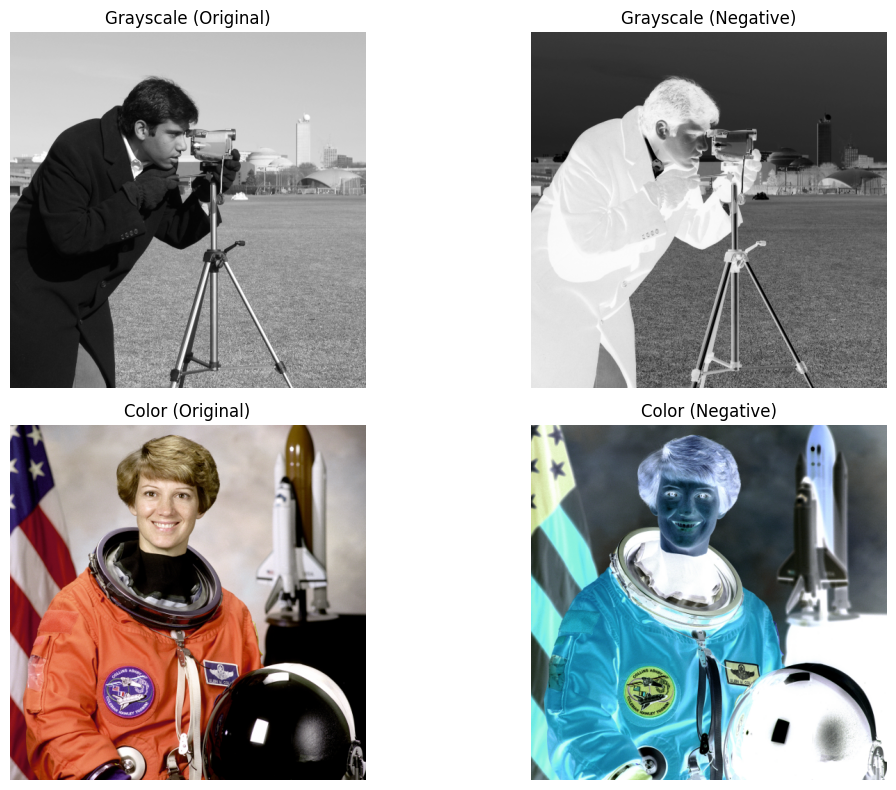

In [2]:
# ===================
# 1. TRANSFORMASI NEGATIF CITRA GRAYSCALE
# ===================
image_gray_uint8 = data.camera()  # Citra grayscale (512x512, 0..255)
image_gray_float = img_as_float(image_gray_uint8)  # Konversi ke float [0..1]

negative_gray = 1.0 - image_gray_float  # Inversi intensitas: output = 1 - input

# ===================
# 2. TRANSFORMASI NEGATIF CITRA BERWARNA
# ===================
image_color_uint8 = data.astronaut()  # Citra berwarna (512x512x3, 0..255)
image_color_float = img_as_float(image_color_uint8)  # Konversi ke float [0..1]

negative_color = 1.0 - image_color_float  # Inversi intensitas tiap kanal RGB

# ===================
# 3. PLOTTING HASIL
# ===================
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Baris 1: Grayscale (original, negative)
axes[0, 0].imshow(image_gray_float, cmap='gray')
axes[0, 0].set_title("Grayscale (Original)")
axes[0, 0].axis('off')

axes[0, 1].imshow(negative_gray, cmap='gray')
axes[0, 1].set_title("Grayscale (Negative)")
axes[0, 1].axis('off')

# Baris 2: RGB (original, negative)
axes[1, 0].imshow(image_color_float)
axes[1, 0].set_title("Color (Original)")
axes[1, 0].axis('off')

axes[1, 1].imshow(negative_color)
axes[1, 1].set_title("Color (Negative)")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Praktikum 2
### Histogram dan Ekualisasi Histogram

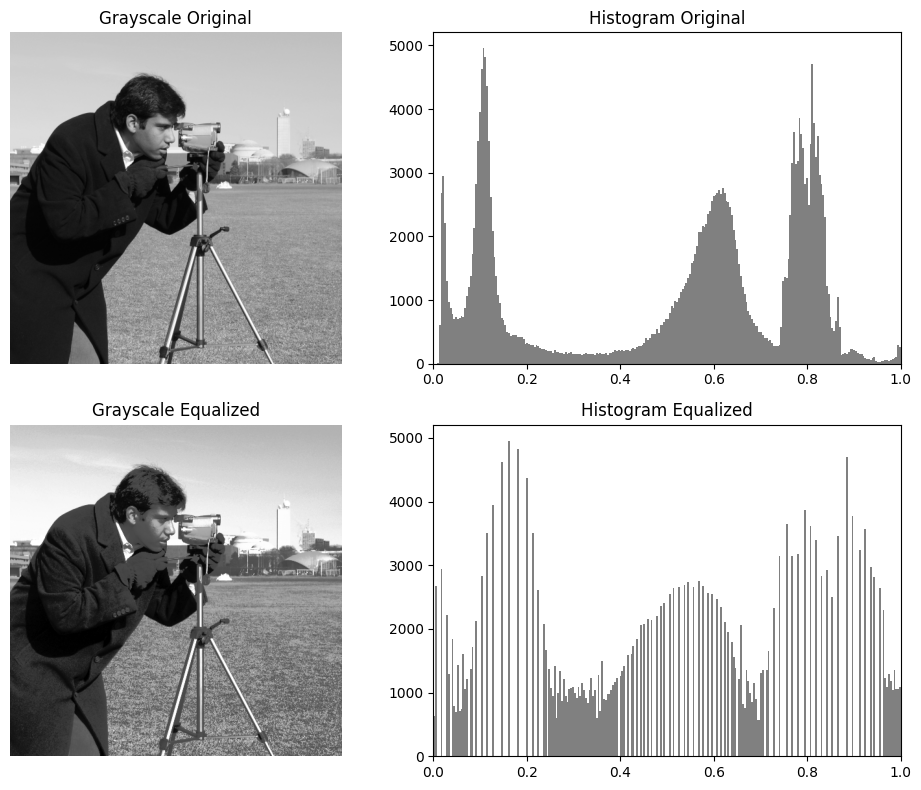

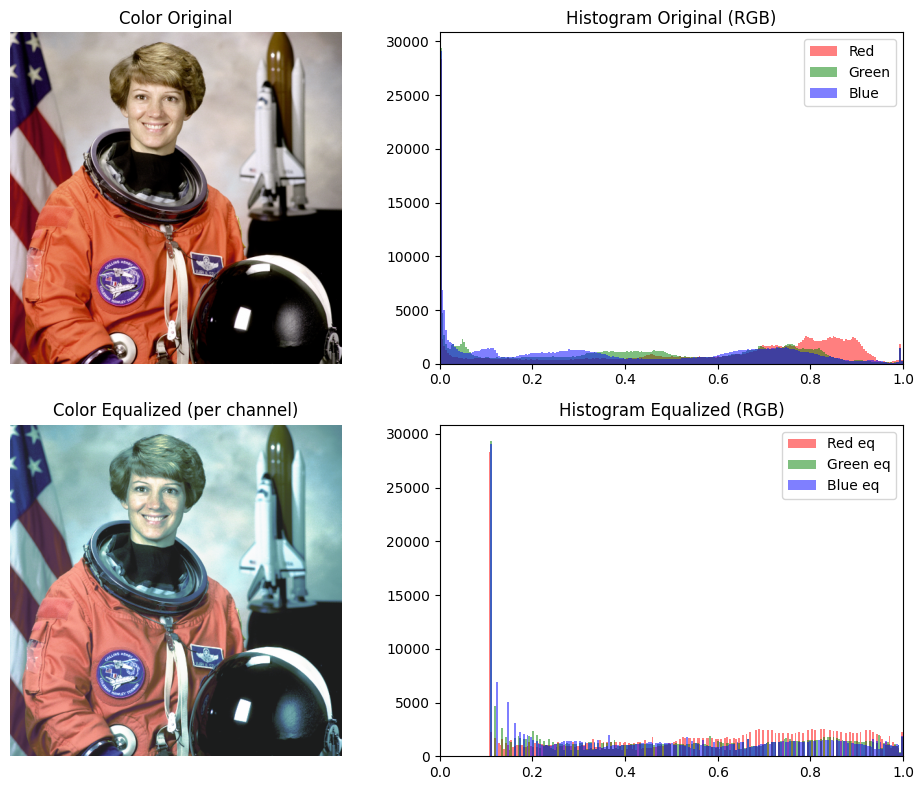

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, exposure

# =======================================
# BAGIAN 1: HISTOGRAM & EKUALISASI HISTOGRAM (GRAYSCALE)
# =======================================

# 1. Memuat citra grayscale
image_gray_uint8 = data.camera()  # Citra grayscale (uint8, 0..255)
image_gray = img_as_float(image_gray_uint8)  # Konversi ke float [0..1]

# 2. Menghitung histogram citra asli
hist_gray, bins_gray = np.histogram(image_gray.ravel(), bins=256, range=(0, 1))

# 3. Ekualisasi histogram
image_gray_eq = exposure.equalize_hist(image_gray)
hist_gray_eq, bins_gray_eq = np.histogram(image_gray_eq.ravel(), bins=256, range=(0, 1))

# 4. Plot hasil grayscale
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# (a) Citra Asli
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Grayscale Original")
axes[0, 0].axis('off')

# (b) Histogram Asli
axes[0, 1].hist(image_gray.ravel(), bins=256, range=(0, 1), color='gray')
axes[0, 1].set_title("Histogram Original")
axes[0, 1].set_xlim(0, 1)

# (c) Citra Setelah Ekualisasi
axes[1, 0].imshow(image_gray_eq, cmap='gray')
axes[1, 0].set_title("Grayscale Equalized")
axes[1, 0].axis('off')

# (d) Histogram Setelah Ekualisasi
axes[1, 1].hist(image_gray_eq.ravel(), bins=256, range=(0, 1), color='gray')
axes[1, 1].set_title("Histogram Equalized")
axes[1, 1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

# =======================================
# BAGIAN 2: HISTOGRAM & EKUALISASI HISTOGRAM (WARNA)
# =======================================

# 1. Memuat citra berwarna
image_color_uint8 = data.astronaut()  # Citra RGB
image_color = img_as_float(image_color_uint8)  # Konversi ke float [0..1]

# 2. Ambil tiap kanal warna
r_channel = image_color[:, :, 0]
g_channel = image_color[:, :, 1]
b_channel = image_color[:, :, 2]

# 3. Histogram tiap kanal
hist_r, bins_r = np.histogram(r_channel.ravel(), bins=256, range=(0, 1))
hist_g, bins_g = np.histogram(g_channel.ravel(), bins=256, range=(0, 1))
hist_b, bins_b = np.histogram(b_channel.ravel(), bins=256, range=(0, 1))

# 4. Ekualisasi tiap kanal
r_eq = exposure.equalize_hist(r_channel)
g_eq = exposure.equalize_hist(g_channel)
b_eq = exposure.equalize_hist(b_channel)

# Gabungkan kembali menjadi gambar RGB
image_color_eq = np.dstack((r_eq, g_eq, b_eq))

# Histogram setelah ekualisasi
hist_r_eq, _ = np.histogram(r_eq.ravel(), bins=256, range=(0, 1))
hist_g_eq, _ = np.histogram(g_eq.ravel(), bins=256, range=(0, 1))
hist_b_eq, _ = np.histogram(b_eq.ravel(), bins=256, range=(0, 1))

# 5. Plot hasil warna
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))

# (a) Citra Asli
axes2[0, 0].imshow(image_color)
axes2[0, 0].set_title("Color Original")
axes2[0, 0].axis('off')

# (b) Histogram Asli RGB
axes2[0, 1].hist(r_channel.ravel(), bins=256, range=(0, 1), color='red', alpha=0.5, label='Red')
axes2[0, 1].hist(g_channel.ravel(), bins=256, range=(0, 1), color='green', alpha=0.5, label='Green')
axes2[0, 1].hist(b_channel.ravel(), bins=256, range=(0, 1), color='blue', alpha=0.5, label='Blue')
axes2[0, 1].set_title("Histogram Original (RGB)")
axes2[0, 1].set_xlim(0, 1)
axes2[0, 1].legend(loc='upper right')

# (c) Citra Setelah Ekualisasi
axes2[1, 0].imshow(image_color_eq)
axes2[1, 0].set_title("Color Equalized (per channel)")
axes2[1, 0].axis('off')

# (d) Histogram RGB Setelah Ekualisasi
axes2[1, 1].hist(r_eq.ravel(), bins=256, range=(0, 1), color='red', alpha=0.5, label='Red eq')
axes2[1, 1].hist(g_eq.ravel(), bins=256, range=(0, 1), color='green', alpha=0.5, label='Green eq')
axes2[1, 1].hist(b_eq.ravel(), bins=256, range=(0, 1), color='blue', alpha=0.5, label='Blue eq')
axes2[1, 1].set_title("Histogram Equalized (RGB)")
axes2[1, 1].set_xlim(0, 1)
axes2[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()

## Praktikum 3
### Konvolusi (Filter Rata-Rata)

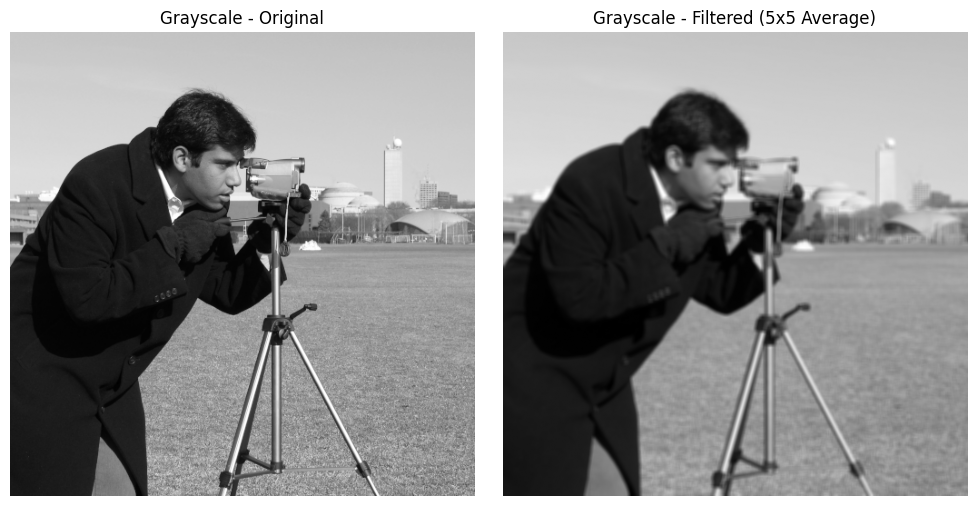

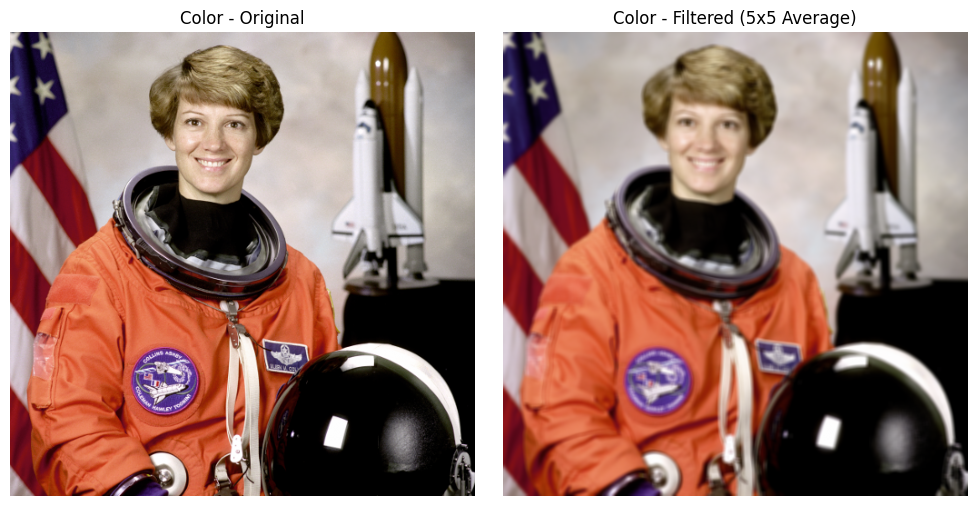

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy import ndimage as ndi


# 1) FILTER RATA-RATA PADA CITRA GRAYSCALE

# A. Memuat citra grayscale (camera)
gray_uint8 = data.camera()  # range 0..255
gray_img = img_as_float(gray_uint8)  # konversi menjadi float [0..1]

# B. Definisikan kernel filter rata-rata (contoh: 5x5)
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=float) / (kernel_size * kernel_size)

# C. Lakukan konvolusi pada citra grayscale
gray_filtered = ndi.convolve(gray_img, kernel, mode='reflect')

# D. Tampilkan hasil
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title("Grayscale - Original")
axes[0].axis('off')

axes[1].imshow(gray_filtered, cmap='gray')
axes[1].set_title(f"Grayscale - Filtered ({kernel_size}x{kernel_size} Average)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# 2) FILTER RATA-RATA PADA CITRA BERWARNA

# A. Memuat citra berwarna (astronaut)
color_uint8 = data.astronaut()  # citra RGB (uint8, 0..255)
color_img = img_as_float(color_uint8)  # konversi float [0..1]

# B. Terapkan filter rata-rata pada tiap kanal R, G, B
color_filtered = np.zeros_like(color_img)
for c in range(3):  # c = 0 (Red), 1 (Green), 2 (Blue)
    channel_original = color_img[:, :, c]
    channel_filtered = ndi.convolve(channel_original, kernel, mode='reflect')
    color_filtered[:, :, c] = channel_filtered

# C. Tampilkan hasil
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 5))
axes2[0].imshow(color_img)
axes2[0].set_title("Color - Original")
axes2[0].axis('off')

axes2[1].imshow(color_filtered)
axes2[1].set_title(f"Color - Filtered ({kernel_size}x{kernel_size} Average)")
axes2[1].axis('off')

plt.tight_layout()
plt.show()

## Praktikum 4
### Filter Median (penghilangan noise/derau)

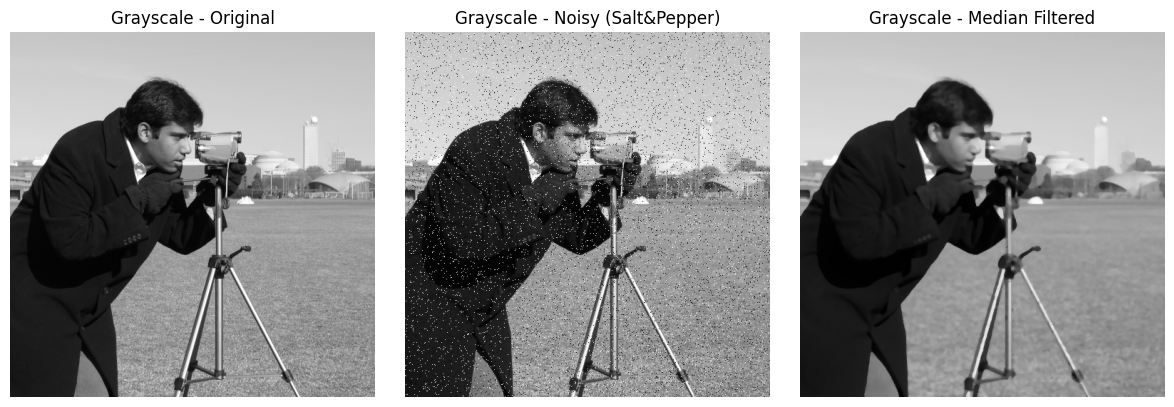

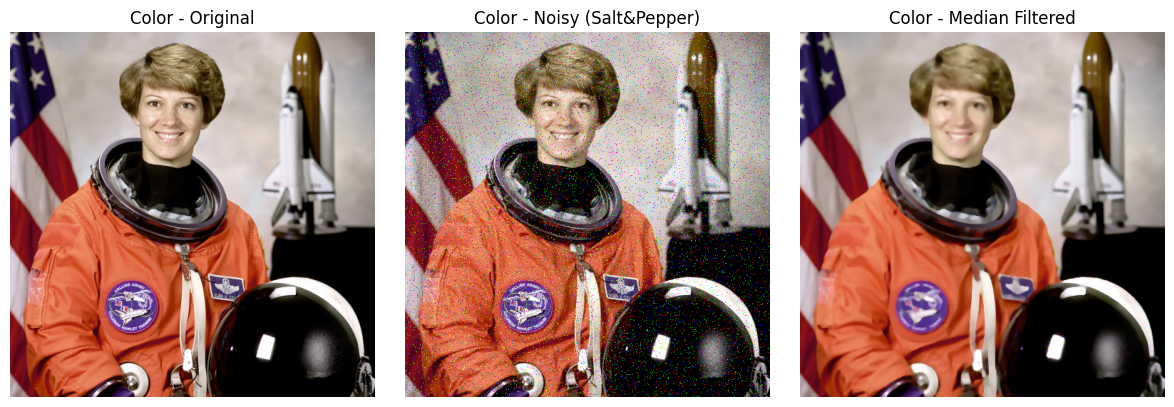

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, filters, morphology, img_as_float

#
# 1) FILTER MEDIAN PADA CITRA GRAYSCALE
#

# A. Memuat citra grayscale (contoh: 'camera')
gray_uint8 = data.camera()  # grayscale, uint8
gray_float = img_as_float(gray_uint8)  # konversi float [0..1]

# B. Menambahkan noise jenis salt-and-pepper
gray_noisy = util.random_noise(gray_float, mode='s&p', amount=0.05)  # amount=0.05 berarti 5% piksel terpengaruh noise

# C. Menerapkan filter median
# Kita gunakan structuring element berbentuk disk radius 3
disk3 = morphology.disk(3)
gray_denoised = filters.median(gray_noisy, disk3)

# D. Plot hasil
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(gray_float, cmap='gray')
axes[0].set_title("Grayscale - Original")
axes[0].axis('off')

axes[1].imshow(gray_noisy, cmap='gray')
axes[1].set_title("Grayscale - Noisy (Salt&Pepper)")
axes[1].axis('off')

axes[2].imshow(gray_denoised, cmap='gray')
axes[2].set_title("Grayscale - Median Filtered")
axes[2].axis('off')

plt.tight_layout()
plt.show()

#
# 2) FILTER MEDIAN PADA CITRA BERWARNA
#

# A. Memuat citra berwarna (contoh: 'astronaut')
color_uint8 = data.astronaut()  # RGB, uint8
color_float = img_as_float(color_uint8)  # rentang [0..1]

# B. Menambahkan noise salt-and-pepper
color_noisy = util.random_noise(color_float, mode='s&p', amount=0.05)

# C. Menerapkan filter median
# Pada scikit-image 0.19+, median() mampu menangani array 3D (RGB),
# atau kita bisa memanggil per kanal. Di sini langsung:
color_denoised = np.zeros_like(color_noisy)
for c in range(color_noisy.shape[2]):
    color_denoised[:, :, c] = filters.median(color_noisy[:, :, c], morphology.disk(3))

# D. Plot hasil
fig2, axes2 = plt.subplots(1, 3, figsize=(12, 4))
axes2[0].imshow(color_float)
axes2[0].set_title("Color - Original")
axes2[0].axis('off')

axes2[1].imshow(color_noisy)
axes2[1].set_title("Color - Noisy (Salt&Pepper)")
axes2[1].axis('off')

axes2[2].imshow(color_denoised)
axes2[2].set_title("Color - Median Filtered")
axes2[2].axis('off')

plt.tight_layout()
plt.show()


## Penugasan 1
### Eksperimen Transformasi Intensitas Lain

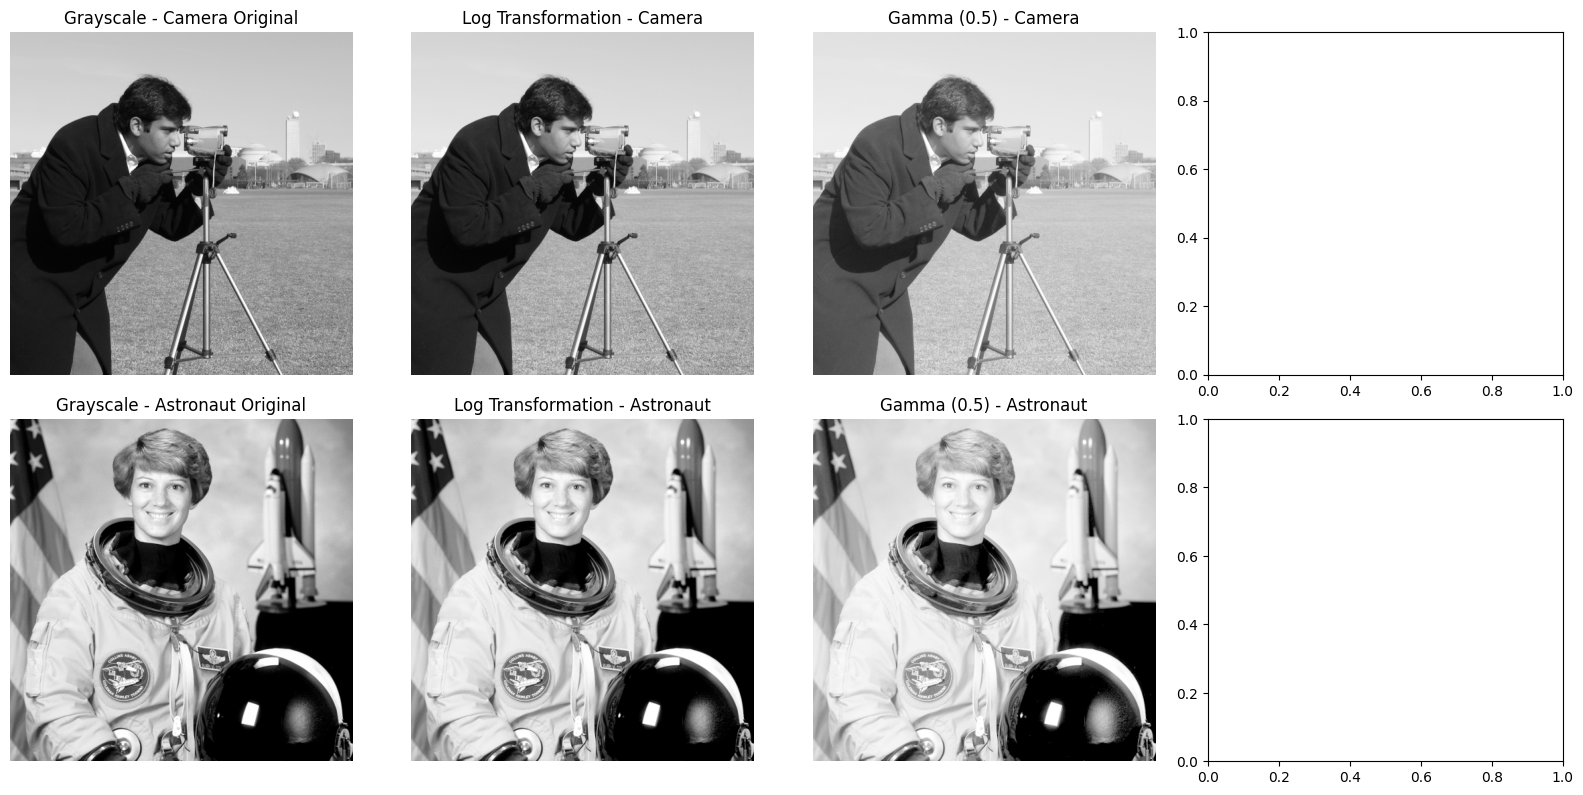

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.exposure import adjust_gamma, adjust_log

# Memuat citra grayscale (contoh: 'camera' dan 'astronaut')
gray_camera = data.camera()  # Citra grayscale
gray_astronaut = data.astronaut()  # Citra berwarna
gray_astronaut_gray = img_as_float(gray_astronaut)[:, :, 0]  # Mengubah astronaut ke grayscale dengan mengambil channel merah

# Normalisasi citra ke rentang [0, 1]
gray_camera_float = img_as_float(gray_camera)  # Citra camera dalam format float [0..1]

# 1. Transformasi Logaritmik
# Fungsi logaritmik akan memperbesar nilai piksel dengan konversi logaritma.
gray_camera_log = adjust_log(gray_camera_float)
gray_astronaut_log = adjust_log(gray_astronaut_gray)

# 2. Transformasi Gamma
# Fungsi gamma akan memperkuat atau meredam intensitas berdasarkan nilai gamma
gamma_value = 0.5  # Coba dengan gamma = 0.5, di bawah 1 mempergelap, di atas 1 memperterang
gray_camera_gamma = adjust_gamma(gray_camera_float, gamma=gamma_value)
gray_astronaut_gamma = adjust_gamma(gray_astronaut_gray, gamma=gamma_value)

# Plot hasil
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Citra Kamera Asli dan Hasil Transformasi
axes[0, 0].imshow(gray_camera_float, cmap='gray')
axes[0, 0].set_title("Grayscale - Camera Original")
axes[0, 0].axis('off')
axes[0, 1].imshow(gray_camera_log, cmap='gray')
axes[0, 1].set_title("Log Transformation - Camera")
axes[0, 1].axis('off')
axes[0, 2].imshow(gray_camera_gamma, cmap='gray')
axes[0, 2].set_title(f"Gamma ({gamma_value}) - Camera")
axes[0, 2].axis('off')

# Citra Astronaut Asli dan Hasil Transformasi
axes[1, 0].imshow(gray_astronaut_gray, cmap='gray')
axes[1, 0].set_title("Grayscale - Astronaut Original")
axes[1, 0].axis('off')
axes[1, 1].imshow(gray_astronaut_log, cmap='gray')
axes[1, 1].set_title("Log Transformation - Astronaut")
axes[1, 1].axis('off')
axes[1, 2].imshow(gray_astronaut_gamma, cmap='gray')
axes[1, 2].set_title(f"Gamma ({gamma_value}) - Astronaut")
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


## Penugasan 2
### Perbandingan Metode Peningkatan Kontras

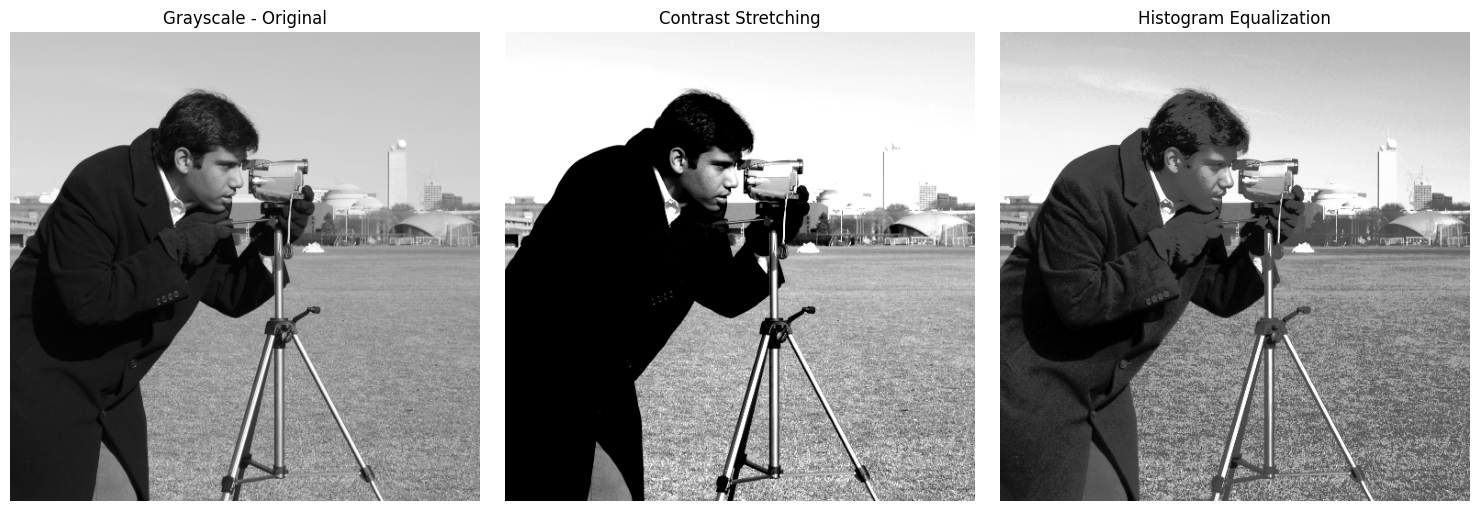

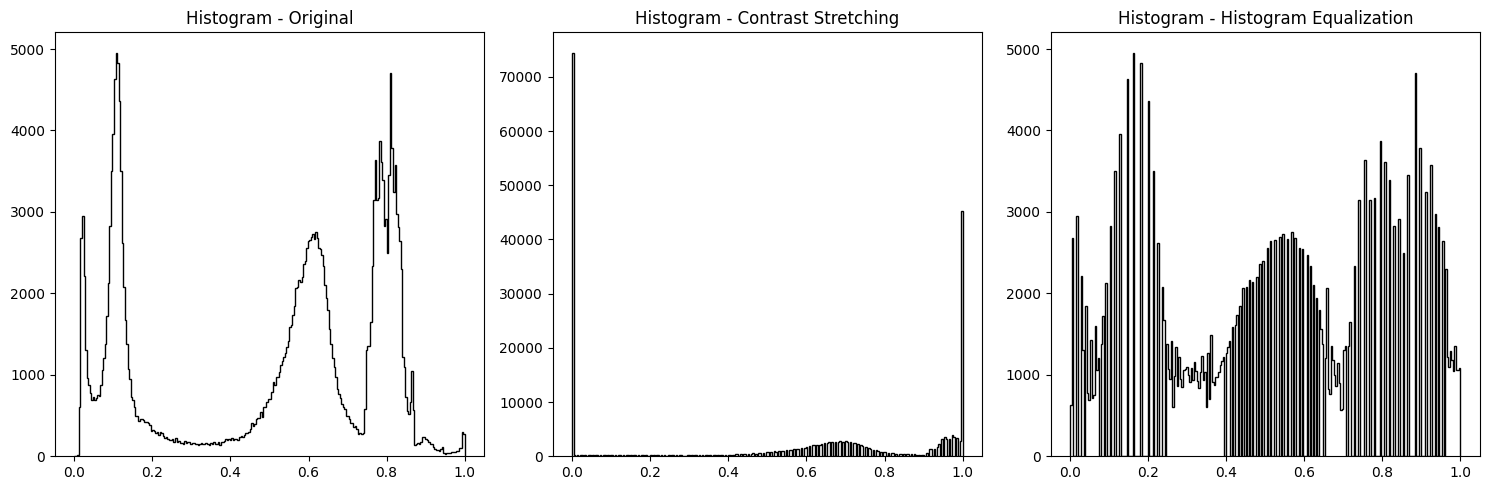

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float

# A. Memuat citra grayscale (contoh: 'camera')
gray_uint8 = data.camera()  # citra grayscale dengan kontras rendah
gray_float = img_as_float(gray_uint8)  # konversi citra menjadi float [0..1]

# B. Peregangan Kontras (Contrast Stretching)
# Menggunakan exposure.rescale_intensity untuk stretch kontras
gray_contrast_stretched = exposure.rescale_intensity(gray_float, in_range=(0.2, 0.8))

# C. Ekualisasi Histogram
# Menggunakan exposure.equalize_hist untuk melakukan ekualisasi histogram
gray_hist_equalized = exposure.equalize_hist(gray_float)

# D. Tampilkan hasil citra dan histogramnya
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray_float, cmap='gray')
axes[0].set_title("Grayscale - Original")
axes[0].axis('off')

axes[1].imshow(gray_contrast_stretched, cmap='gray')
axes[1].set_title("Contrast Stretching")
axes[1].axis('off')

axes[2].imshow(gray_hist_equalized, cmap='gray')
axes[2].set_title("Histogram Equalization")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Plot histogram dari citra asli dan hasil kedua teknik peningkatan kontras
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))

# Histogram citra asli
axes2[0].hist(gray_float.ravel(), bins=256, histtype='step', color='black')
axes2[0].set_title("Histogram - Original")

# Histogram citra setelah contrast stretching
axes2[1].hist(gray_contrast_stretched.ravel(), bins=256, histtype='step', color='black')
axes2[1].set_title("Histogram - Contrast Stretching")

# Histogram citra setelah ekualisasi histogram
axes2[2].hist(gray_hist_equalized.ravel(), bins=256, histtype='step', color='black')
axes2[2].set_title("Histogram - Histogram Equalization")

plt.tight_layout()
plt.show()


## Penugasan 3
### Filter Median vs Filter Rata-rata

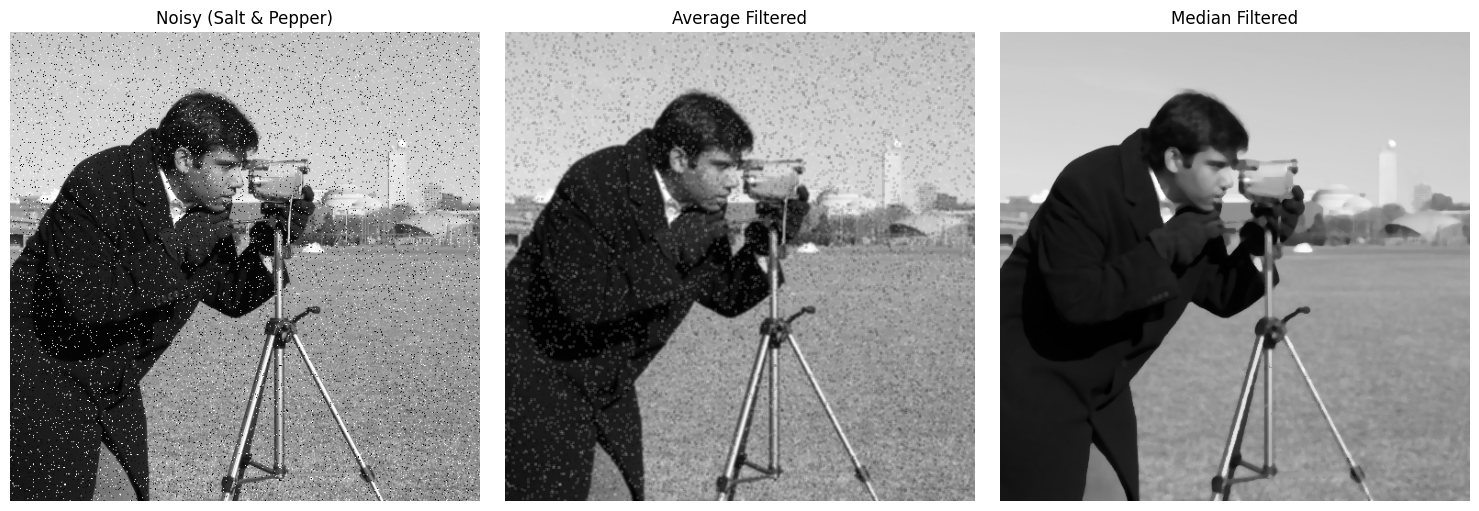

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, filters, img_as_float, morphology
from scipy.ndimage import convolve  # Ganti ini

# A. Memuat citra grayscale
gray_uint8 = data.camera()
gray_float = img_as_float(gray_uint8)

# B. Tambahkan noise salt-and-pepper
gray_noisy = util.random_noise(gray_float, mode='s&p', amount=0.05)

# C. Filter rata-rata dengan convolve dari scipy
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), dtype=float) / (kernel_size ** 2)
gray_avg_filtered = convolve(gray_noisy, kernel)  # Gunakan scipy.ndimage.convolve

# D. Filter median
disk3 = morphology.disk(3)
gray_median_filtered = filters.median(gray_noisy, disk3)

# E. Tampilkan hasil
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray_noisy, cmap='gray')
axes[0].set_title("Noisy (Salt & Pepper)")
axes[0].axis('off')

axes[1].imshow(gray_avg_filtered, cmap='gray')
axes[1].set_title("Average Filtered")
axes[1].axis('off')

axes[2].imshow(gray_median_filtered, cmap='gray')
axes[2].set_title("Median Filtered")
axes[2].axis('off')

plt.tight_layout()
plt.show()
